In [1]:
import numpy as np
from tools.general import Trajectory, Display
from tools.gridsearch import DisplayGridSearch
from tools.linesearch import DisplayLineSearch

In [2]:
N_planets = 3
planet_radius = 0.1
gravity_constant = 0.1
traj_boundaries = np.array([[-1,1],[-1,1]])
dt = 0.01
Tmax = 300

traj = Trajectory(N_planets, planet_radius, gravity_constant, traj_boundaries, dt, Tmax)
planets_loc = traj.gen_planets(traj.bounds, 0.2) ; p0 = traj.gen_shuttle(0.2)

# uncomment and modify p0 to load a previously saved configuration
p0 = np.array([0.0, 0.0]); planets_loc = np.load('save/planets_loc/[{}, {}].npy'.format(p0[0],p0[1])); traj.reset(p0,loc = planets_loc)

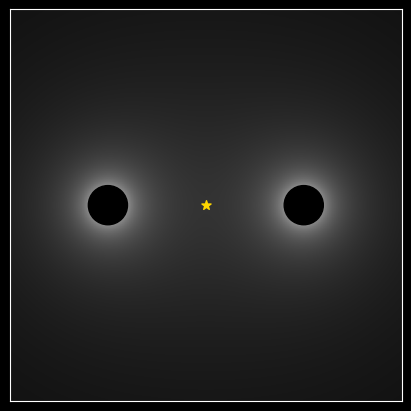

In [3]:
d = Display(traj)
d.plot_config()

In [4]:
n = 1000

In [5]:
dg = DisplayGridSearch(traj,n,border=True)

4692 maximum(s) - proposal [327, 258] : v = [-0.35,-0.48]


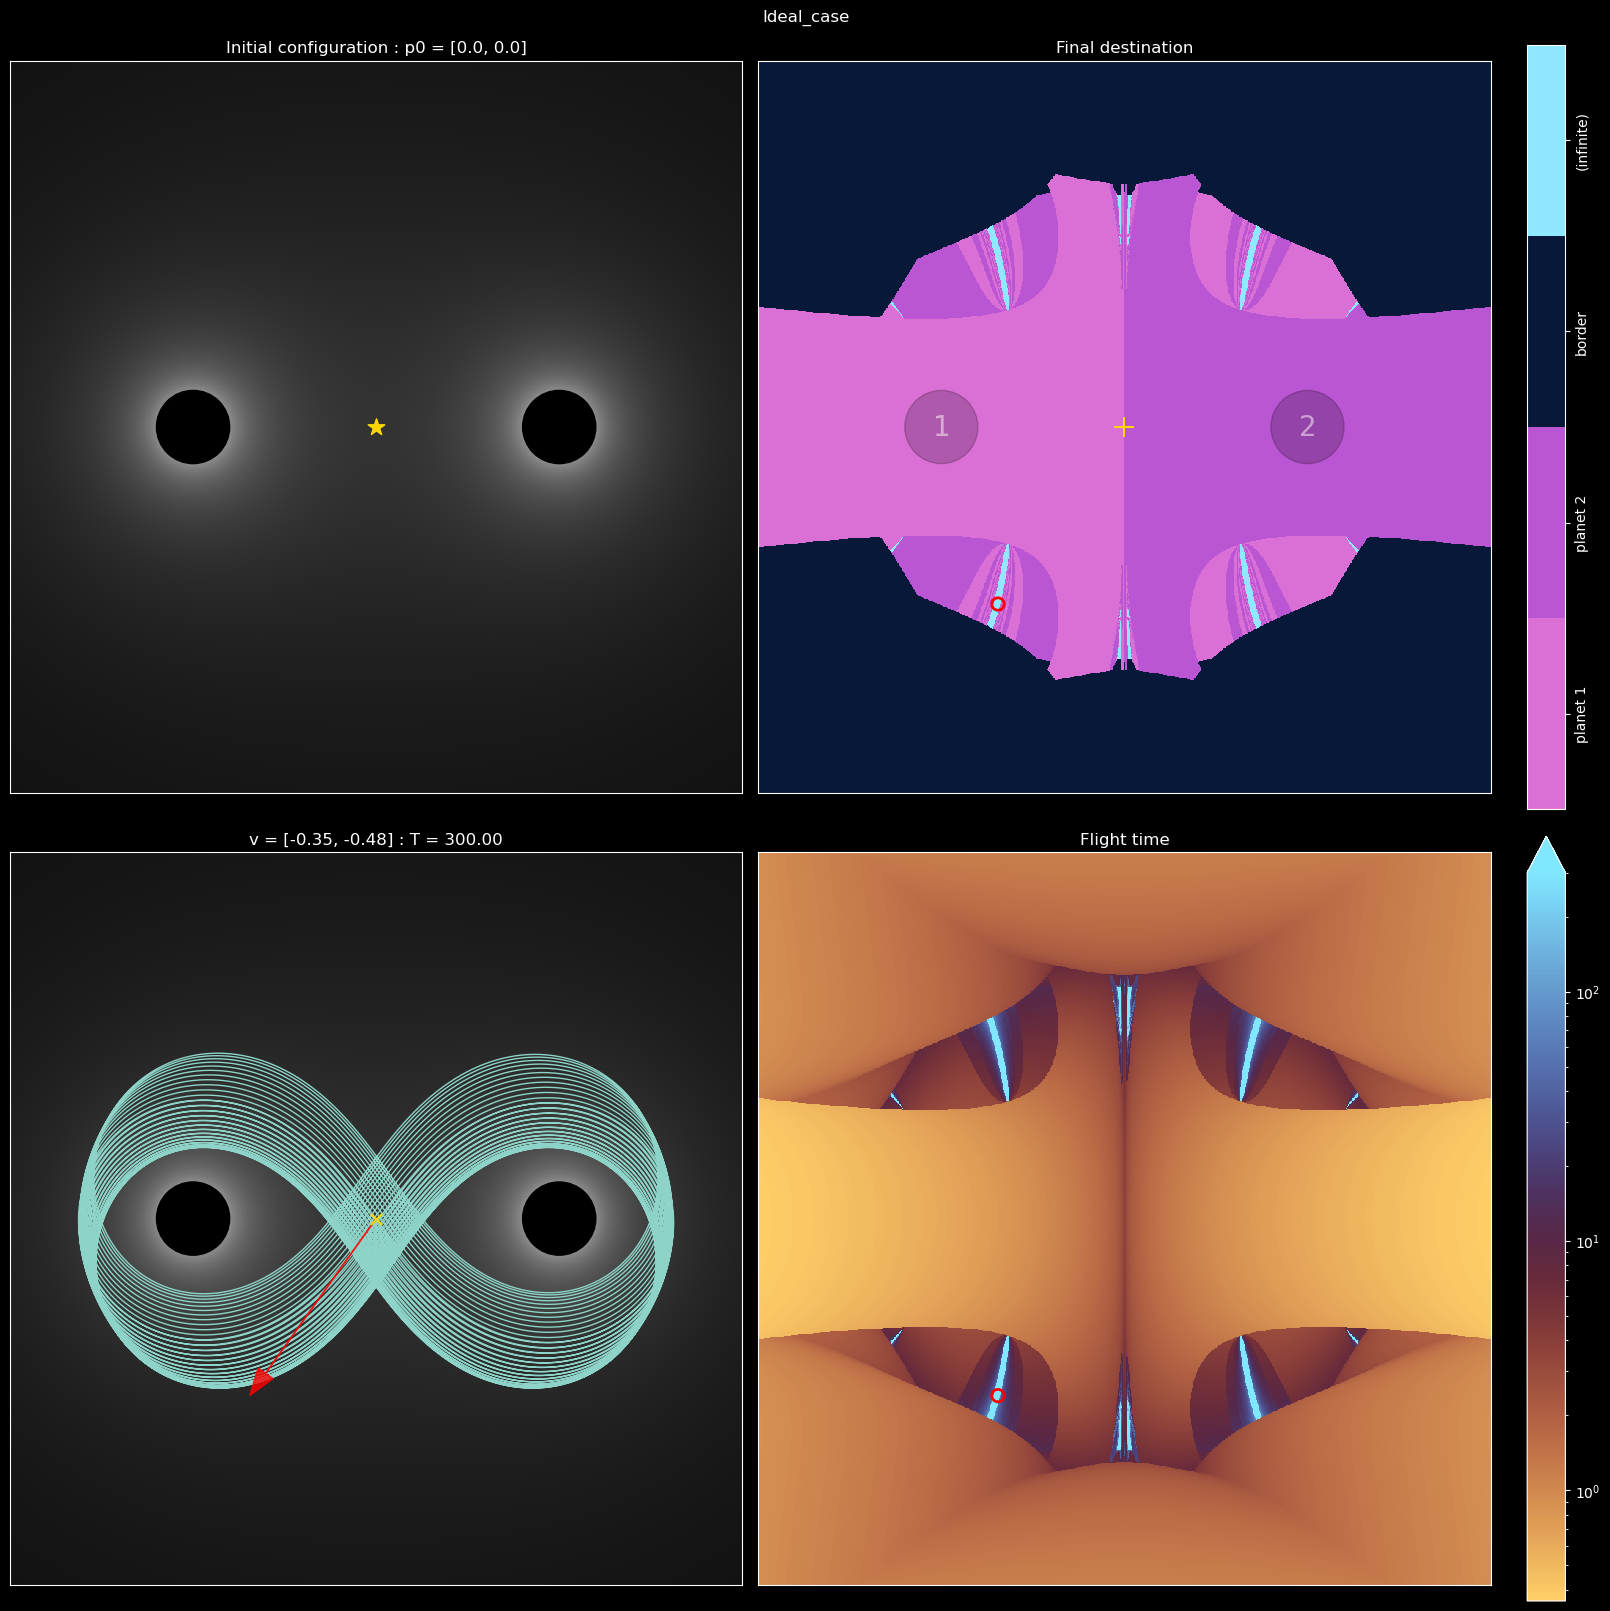

In [6]:
dg.plot4(title='Ideal_case',save=True)

In [7]:
dg2 = DisplayGridSearch(traj,200,border=True)
dg3 = DisplayGridSearch(traj,200,border=False)

180 maximum(s) - proposal [132, 61] : v = [0.33,-0.39]
14880 maximum(s) - proposal [190, 57] : v = [0.91,-0.43]


In [8]:
import matplotlib.pyplot as plt

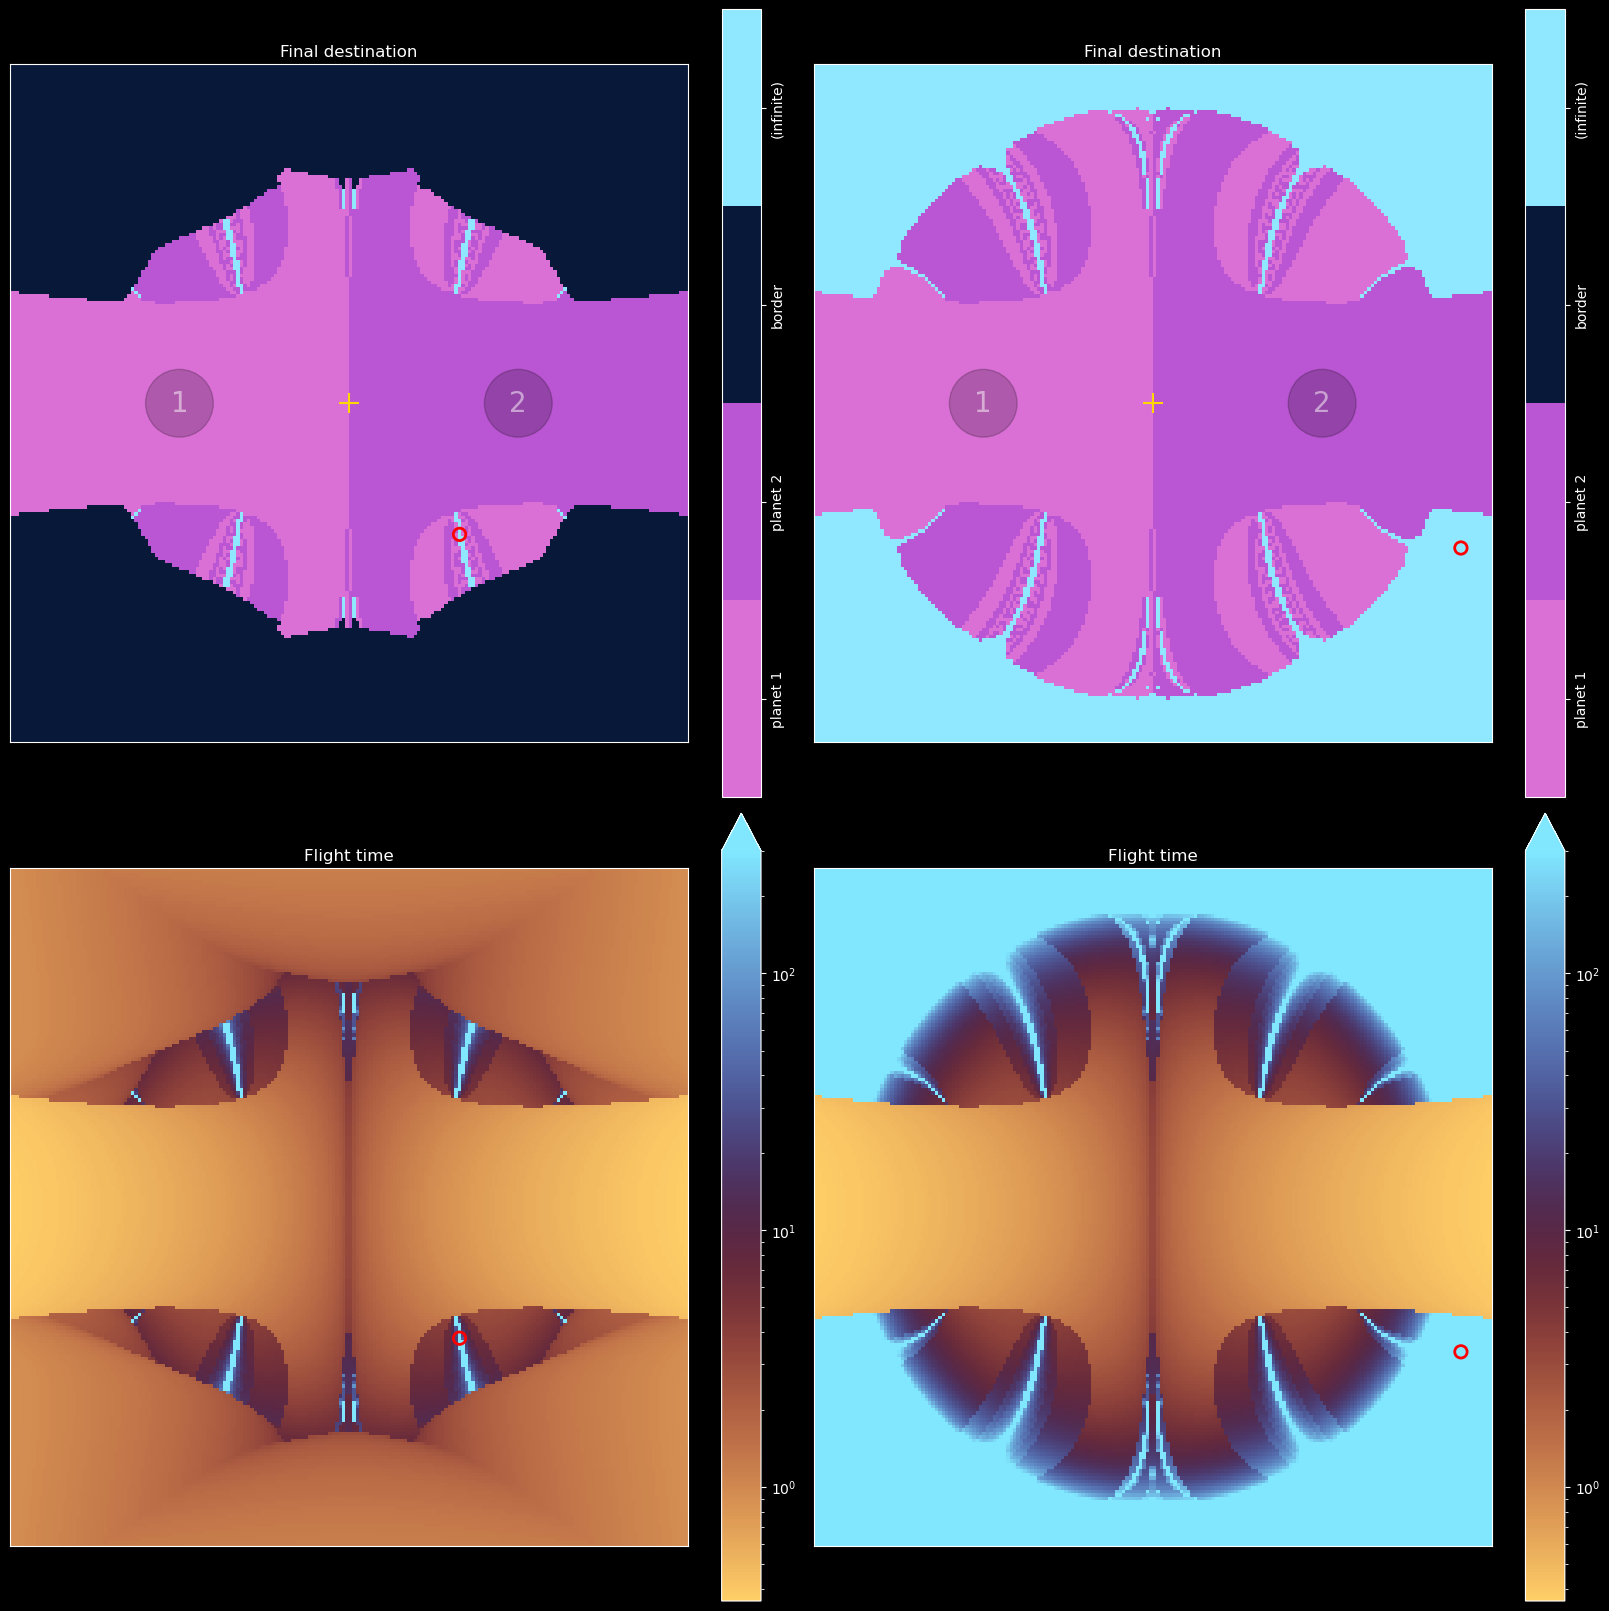

In [9]:
fig, axs = plt.subplots(2,2,figsize=(16,16),layout='constrained',subplot_kw = {'aspect':1})
dg2.heatmap_crashsite(axs[0,0])
dg3.heatmap_crashsite(axs[0,1])
dg2.heatmap_score(axs[1,0])
dg3.heatmap_score(axs[1,1])